All classification models can be converted into regression models

# _k_-Nearest Neighbors
## Starting with an Analogy

## Friend inventory

<img src="img/bullseye2.png" width="450">

## Friend Inventory
### What would each person choose?

<img src="img/movies.png" width="450">

## Friend Inventory
### Decision majority by ring

If you just polled the inner ring of people, what movie would you end up seeing?
- How about if you polled the first *and* second ring?
- The first three rings?
- All of it?

Share with your neighbor what movie you'd end up seeing.

## Friend Inventory
### What did you end up seeing?

Who's movie choices changed based on how many people you polled?
<img src="img/movies.png" width="450">



## Friend Inventory
### What's the "algorithm" we used for this process?

### How does this relate to _k_-nearest neighbors (_k_-NN)?

<img src="img/bullseye-annotate.png" width="450">

# Starting Off

We are going to use the Pima Native Americans diabetes dataset.  
Can we use $k$-NN to classify people correctly and then **predict if someone will have diabetes**?

# Implementing a _k_-Nearest Neighbors Model

## Objective: 
- To be able to implement a $k$-NN classification model, and utilize a visualization to identify the best value of $k$.

## Agenda

- What is the **_k_-nearest neighbors** classification model?
- How do you use the sklearn grid search function?


## _k_-Nearest Neighbors (k-NN) classification

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made. 

This is because for each new point, the algorithm computes the distance to **every single** point, sorts by ascending order and then picks the top "neighbors." Unlike regression, where the modeling and calculation is already done, and the new point is just fit to the regression equation.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the k-NN algorithm work?

### What should the black point be?

<img src="img/KNN-Classification.gif" width="550">

### Choosing _k_

- If _k_ is too small, sensitive to noise points  
- If _k_ is too large, neighborhood may include points from other classes

### Voting

**How to break ties:**

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the _k_ by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors
    
### Scaling

Attributes may have to be scaled to prevent distance measures from being dominated by one of the attributes

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### _k_-NN classification map (_k_=1)

<img src="img/04_1nn_map.png" width="450">

### _k_-NN classification map (_k_=5)

<img src="img/04_5nn_map.png" width="450">

## A bit more math

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



## A bit more math
### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

<img src='img/euclidean-distance.png' width=500>

## A bit more math
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
<img src='img/vectorgraph.jpg' width=500>

## A bit more math
### Euclidean Distance Equation
<img src='img/euclidean-equation.png' width=200>

The source of this formula is in the Pythagorean theorem. 

## Implementing the _k_-NN Classifier with SKlearn

## The Pima dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
diabetes = pd.read_csv('diabetes.csv')

### Notice something wrong here?

In [32]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [33]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12393a438>,
      dtype=object)

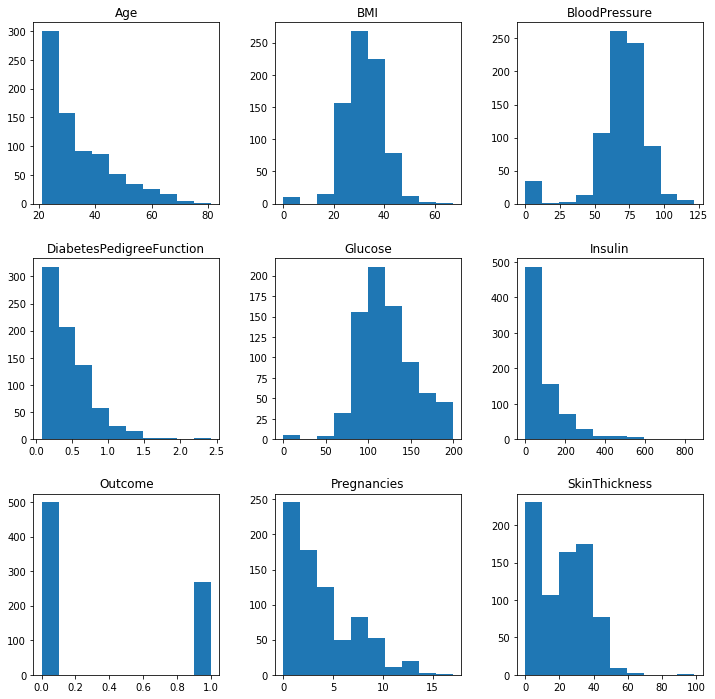

In [35]:
diabetes.hist(grid = False, figsize = (12,12))

In [36]:
# IMPUTE DATA!

diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
diabetes_copy = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

In [38]:
# this is OK because we know these variables cannot actually be zero in practice
diabetes_copy = diabetes_copy.replace(0, np.nan)

In [39]:
diabetes_copy.isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [40]:
for col in cols:
    diabetes_copy[col].fillna(diabetes_copy[col].mean(), inplace = True)
    
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)

In [41]:
X = pd.concat([diabetes_copy, diabetes.drop(columns = cols,axis=1)],axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.00000,155.548223,33.6,6,0.627,50,1
1,85.0,66.0,29.00000,155.548223,26.6,1,0.351,31,0
2,183.0,64.0,29.15342,155.548223,23.3,8,0.672,32,1
3,89.0,66.0,23.00000,94.000000,28.1,1,0.167,21,0
4,137.0,40.0,35.00000,168.000000,43.1,0,2.288,33,1


In [42]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [43]:
y = diabetes.Outcome

In [44]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(768, 9)
(768,)


In [45]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled


#### What kind of scaler should we use?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html  
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## scikit-learn 4-step modeling pattern

<img src='img/sklearnsteps.png' width=500>

**Step 1:** Import the class you plan to use  

[k-NN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)

**Class specifications**
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [48]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [50]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [51]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7447916666666666
F1: 0.6524822695035462


In [52]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[97 26]
 [23 46]]


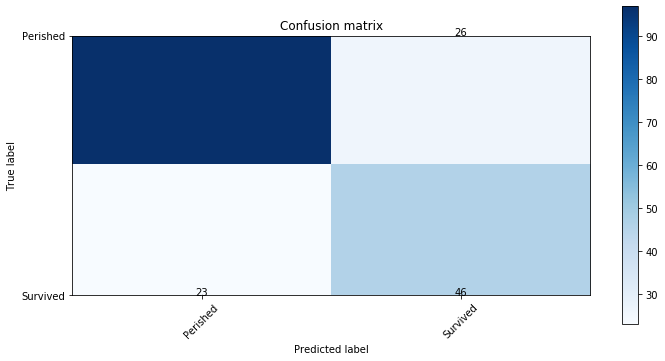

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Using a different value for k

In [54]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [55]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.75
F1: 0.6417910447761194


In [56]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       123
           1       0.66      0.62      0.64        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



Confusion Matrix, without normalization
[[101  22]
 [ 26  43]]


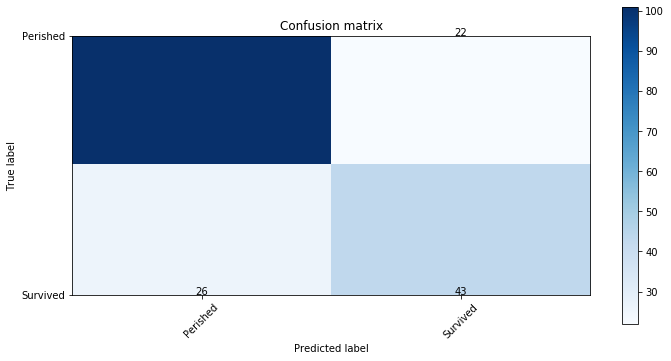

In [57]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Search for an optimal value of _k_ for _k_-NN


In [58]:
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7459312888538657, 0.7288647342995169, 0.7347883937747762, 0.7428664890041294, 0.748268656716418, 0.7491198865808588, 0.7692462686567164, 0.7593194980694981, 0.7740625842494683]


#### Visual comparison of different _K_s

This is not an ROC curve

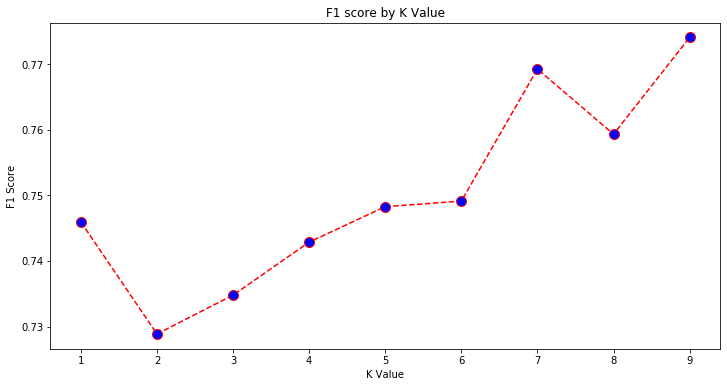

In [59]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of _k_ performs best on our Test data?

Here we use F score, what other metrics could we use?

### How do you think _k_ size relates to our concepts of bias and variance?

<img src='img/K-NN_Neighborhood_Size_print.png' width=500>

## Advantages of _k_-NN

- Non-parametric
- No assumptions
- Versatile
- Very Handy

## Limitations of _k_-NN

- Does not work well in higher dimensions
- Computationally expensive
- Sensitive to noise and outliers


## Driving the point home

<img src='img/knn-process.png' width=800>




## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)